# MOwNiT – aproksymacja średniokwadratowa wielomianami algebraicznymi

__Przygotował:__
__Szymon Budziak__

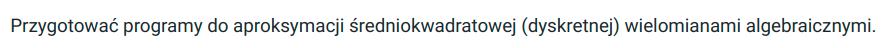

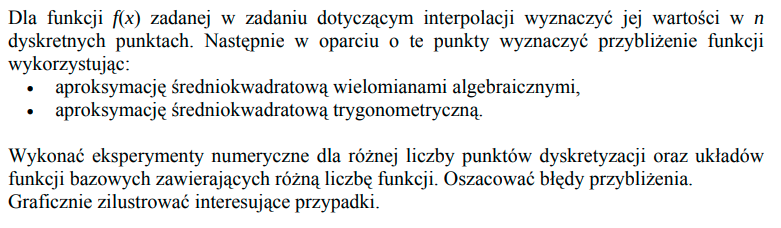

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Function to interpolate

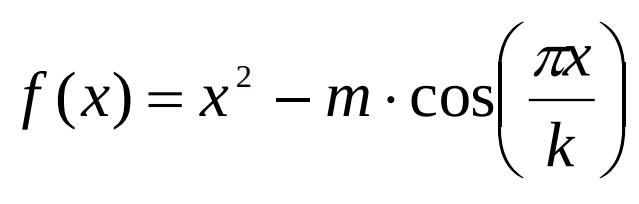

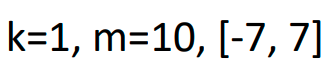

In [2]:
def func(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

**Plot of the function**

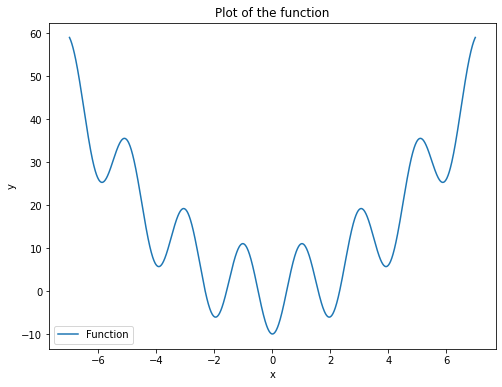

In [3]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [4]:
def visualize(x, y, start, stop, n, m, function):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(start, stop+0.01, 0.01)
    plt.plot(X, func(X), label = "Function",color="red")
    plt.plot(X, function(X), label = "Least squares approximation", color="blue")
    plt.title(f"Least squares approximation on {n} nodes and m={m}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [5]:
def max_error(Y1, Y2):
    return max([abs(Y1[i] - Y2[i]) for i in range(len(Y1))])

In [6]:
def sum_square_error(Y1, Y2):
    return sum([(Y1[i] - Y2[i])**2 for i in range(len(Y1))])

## Least squares approximation

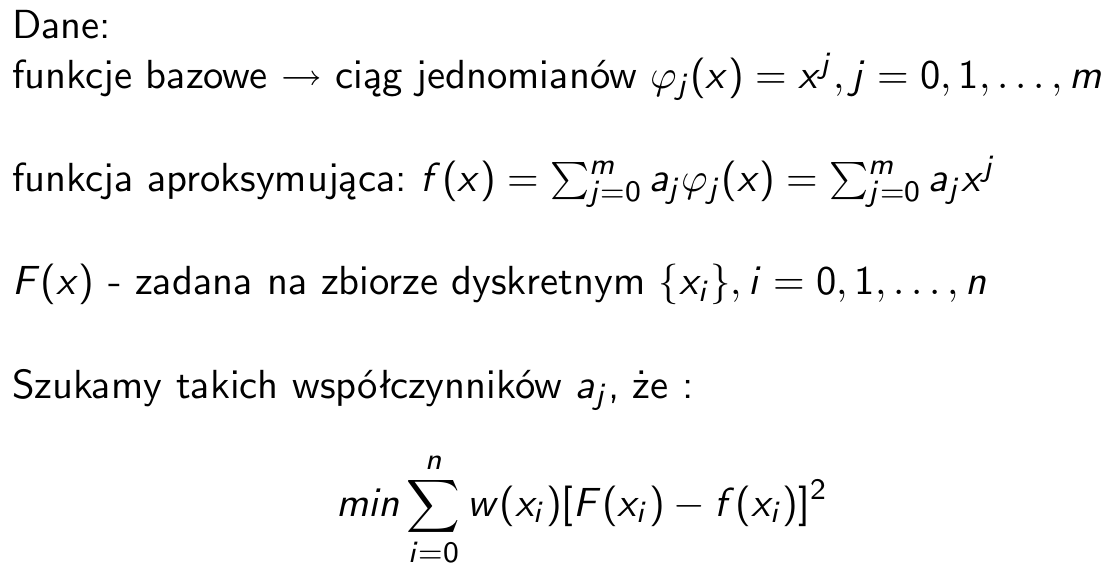

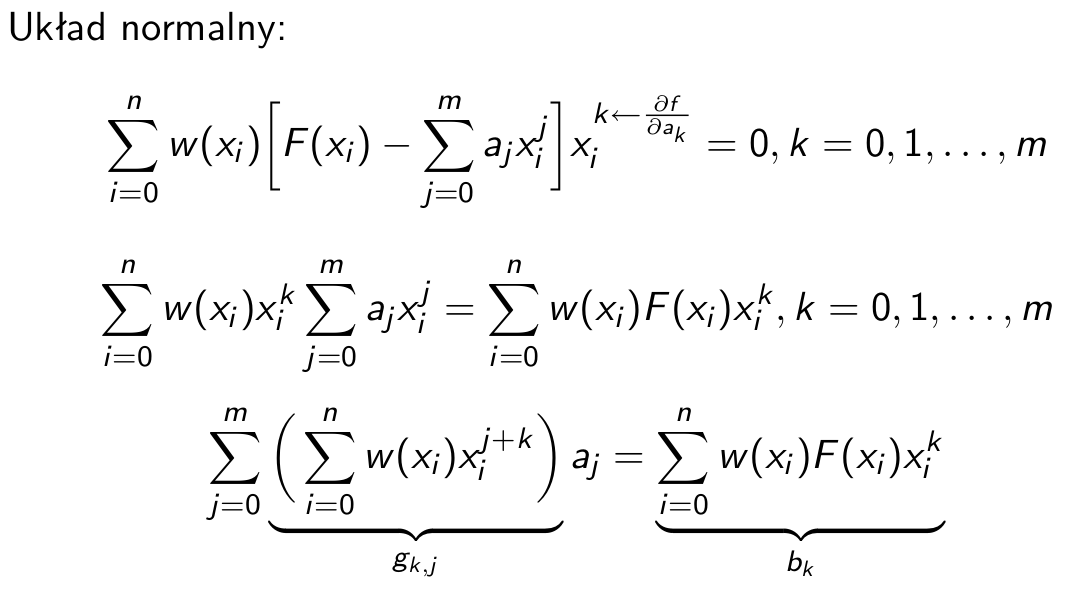

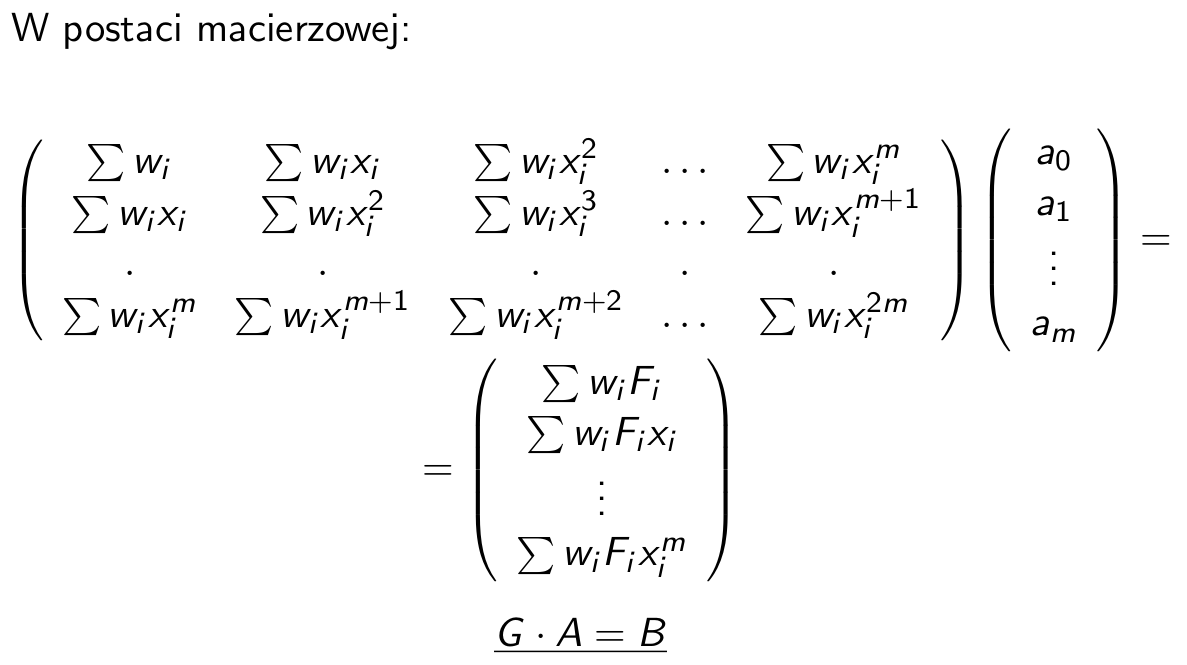

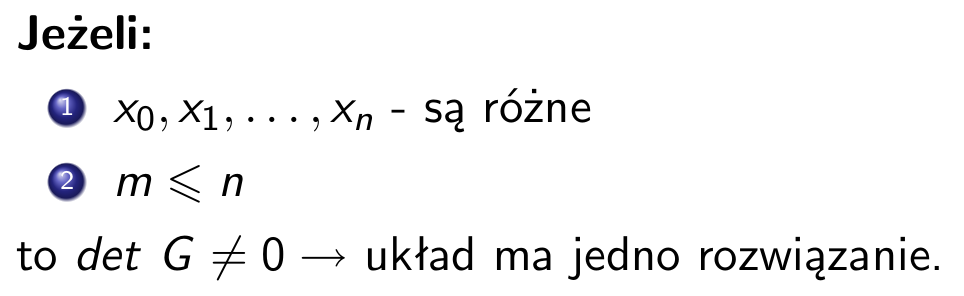

In [7]:
def calculate_A(G, B):
    A = np.linalg.solve(G, B)
    return A
    
def least_squares_approximation_func(X, Y, m):
    n = len(X)
    weights = [1] * n
    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            G[j, k] = sum(weights[i] * X[i]**(j+k) for i in range(n))
        B[j] = sum(weights[i] * Y[i] * X[i]**j for i in range(n))
    A = calculate_A(G, B)
    return lambda x: sum(A[i] * x**i for i in range(m))

In [8]:
def ls_approximation(start, stop, n, m):
    X = np.linspace(start, stop, n)
    Y = func(X)
    ls_approximation = least_squares_approximation_func(X, Y, m)
    visualize(X, Y, start, stop, n, m, ls_approximation)

n = 5 and m = 3

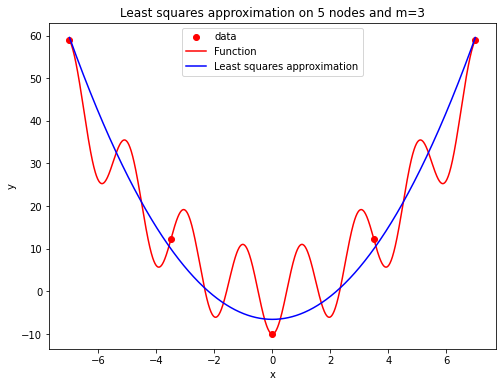

In [9]:
ls_approximation(-7, 7, 5, 3)

n = 12 and m = 5

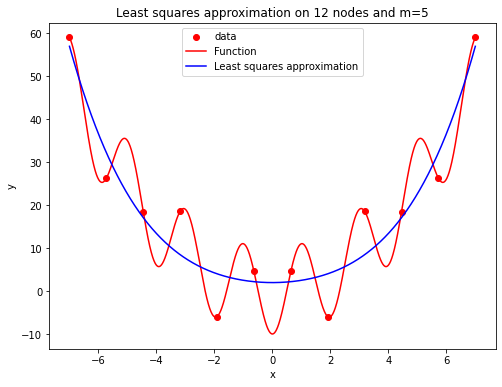

In [10]:
ls_approximation(-7, 7, 12, 5)

n = 15 and m = 6

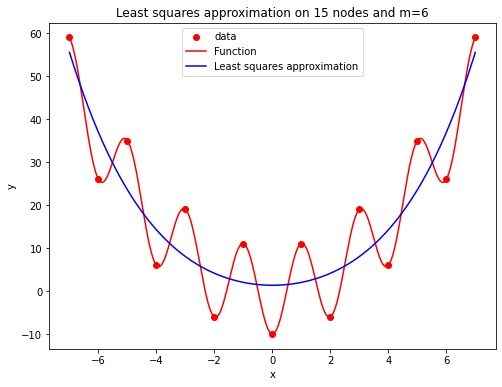

In [11]:
ls_approximation(-7, 7, 15, 6)

n = 15 and m = 12

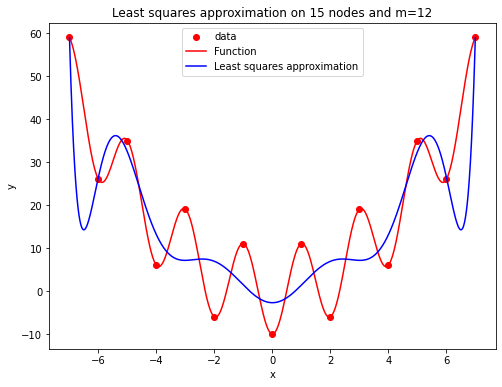

In [12]:
ls_approximation(-7, 7, 15, 12)

n = 25 and m = 10

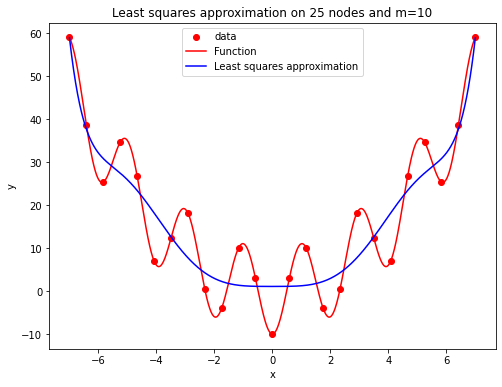

In [13]:
ls_approximation(-7, 7, 25, 10)

n = 25 and m = 15

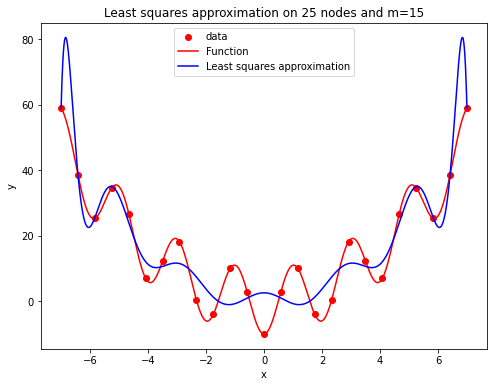

In [14]:
ls_approximation(-7, 7, 25, 15)

n = 40 and m = 3

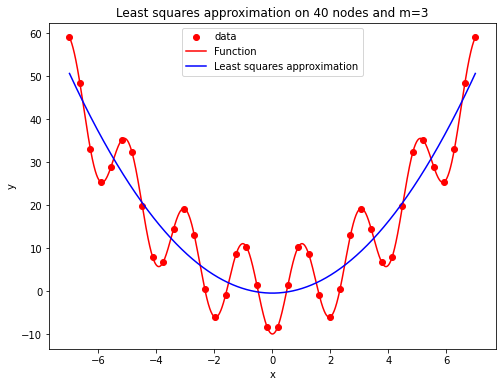

In [15]:
ls_approximation(-7, 7, 40, 3)

n = 45 and m = 25

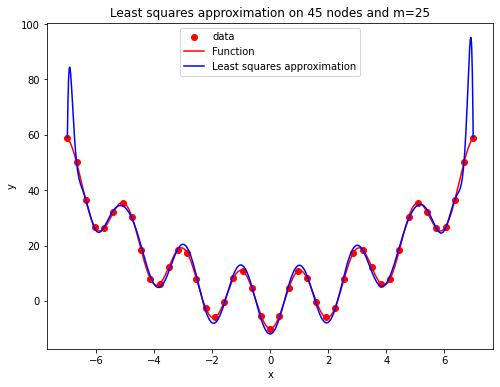

In [16]:
ls_approximation(-7, 7, 45, 25)

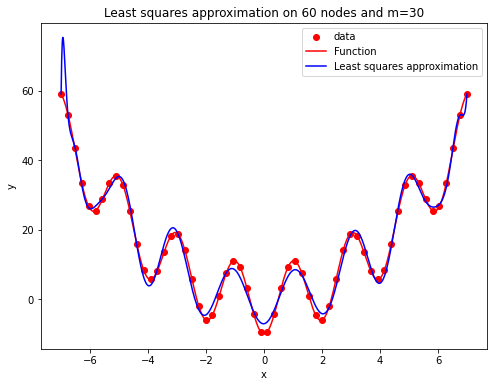

In [17]:
ls_approximation(-7, 7, 60, 30)

## Error for least squares approximation

In [18]:
def calculate_error(start, stop, m):
    nodes = [4, 5, 7, 10, 15, 20, 30, 50]
    result = [None for _ in range(2 * len(m) * len(nodes))]

    total_X = np.linspace(start, stop, 1000)
    func_val = func(total_X)
    idx = 0

    for n in nodes:
        X = np.linspace(start, stop, n)
        Y = func(X)
        for i in m:
            ls_approximation = least_squares_approximation_func(X, Y, i)
            ls_approximation_result = ls_approximation(total_X)
            result[idx] = max_error(ls_approximation_result, func_val)
            result[idx + 1] = sum_square_error(ls_approximation_result, func_val)
            idx += 2
    df = pd.DataFrame(data={"n": nodes * len(m),
                            "m": [val for val in m for _ in range(len(nodes))],
                            "ls approximation max error": result[::2],
                            "ls approximation sum square error": result[1::2]})
    return df

In [19]:
df = calculate_error(-7, 7, [2, 5, 8, 10, 12, 15])
df

,n,m,ls approximation max error,ls approximation sum square error
0,4,2,39.719750,4.471498e+05
1,5,2,74.296259,1.558274e+06
2,7,2,42.602540,2.439262e+05
3,10,2,32.913118,1.632479e+05
4,15,2,24.697174,1.033603e+05
5,20,2,82.606308,2.021835e+06
6,30,2,36.497528,3.715237e+05
7,50,2,19.908195,1.049595e+05
8,4,5,18.920852,8.817508e+04
9,5,5,19.234876,1.017368e+05


In [20]:
print(df["ls approximation max error"].idxmin())
print(df["ls approximation sum square error"].idxmin())

46
47


Dzięki max error oraz sum square error możemy znaleźć najlepszy wielomian (jego stopień) który aproksymuje naszą funkcję. Rozpatrzyliśmy to dla węzłów: 4, 5, 7, 10, 15, 20, 30, 50 oraz m: 2, 5, 8, 10, 12, 15. W naszym przypadku jest to wielomian stopnia 30 dla m = 15 dla max error i wielomian stopnia 50 dla m = 15 dla sum square error.

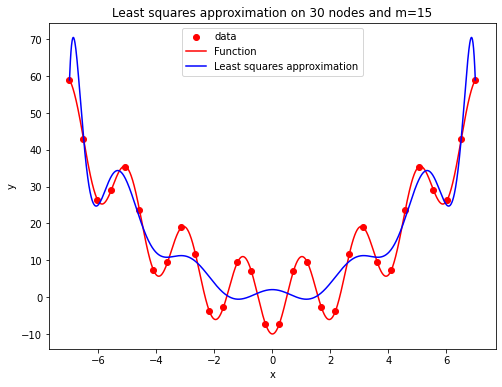

In [21]:
ls_approximation(-7, 7, 30, 15)

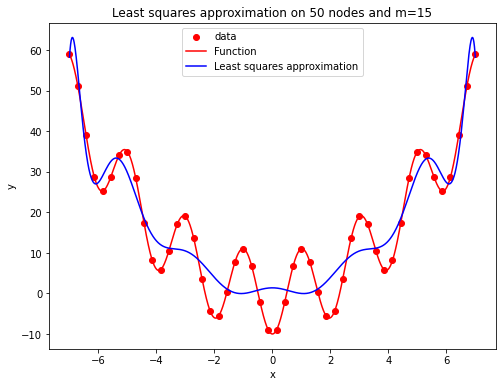

In [22]:
ls_approximation(-7, 7, 50, 15)

## Efekt Rungego

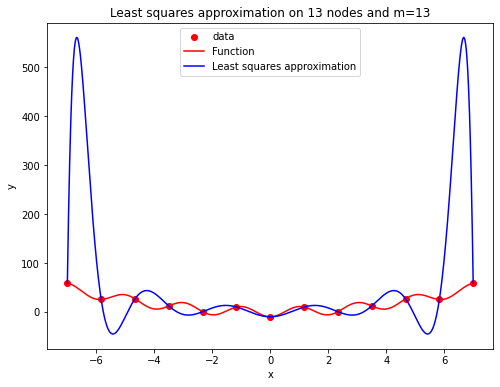

In [23]:
ls_approximation(-7, 7, 13, 13)

Efekt Rungego możemy zaobserwować już dla liczby węzłów równej 13 oraz m = 13. Możemy to zaobserwować na wykresach oraz na obliczonych błędach. Efekt Rungego nie występuje przy każdym użyciu węzła i liczby m. Zależy to od dobrania tych dwóch parametrów. Możemy jednak zauważyć, że dla większej liczby węzłów i większej liczby m efekt Rungego występuje częsciej niż dla mniejszych wartości tych parametrów.

Przykładu efektu Rungego z innymi parametrami:

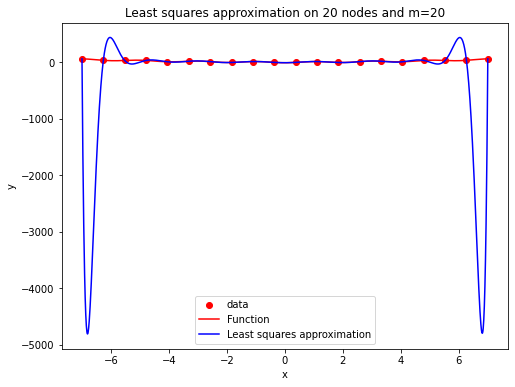

In [24]:
ls_approximation(-7, 7, 20, 20)

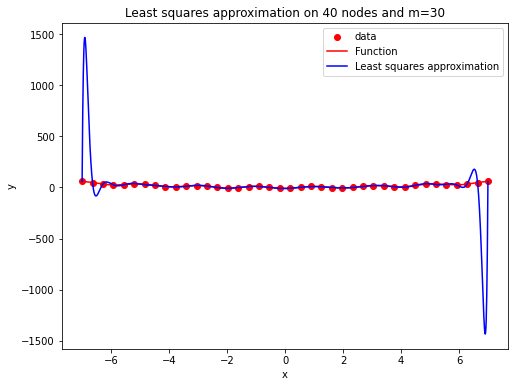

In [25]:
ls_approximation(-7, 7, 40, 30)